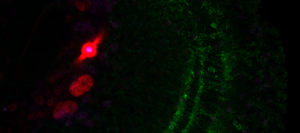

In [8]:
from PIL import Image 
image = Image.open(r"/groups/scicompsoft/home/rokickik/data/zMAX-NP02_R1_2_4_SS01019_DH31_546_DH44_647_095x_ROL2.png") 
MAX_SIZE = (300, 300) 
  
image.thumbnail(MAX_SIZE) 
  
# creating thumbnail 
#image.save('pythonthumb.png') 
display(image)

In [9]:
# From https://note.nkmk.me/en/python-pillow-add-margin-expand-canvas/
def expand2square(pil_img, background_color):
    width, height = pil_img.size
    if width == height:
        return pil_img
    elif width > height:
        result = Image.new(pil_img.mode, (width, width), background_color)
        result.paste(pil_img, (0, (width - height) // 2))
        return result
    else:
        result = Image.new(pil_img.mode, (height, height), background_color)
        result.paste(pil_img, ((height - width) // 2, 0))
        return result


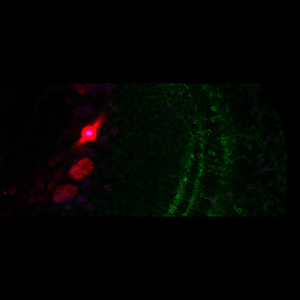

In [10]:
im = Image.open(r"/groups/scicompsoft/home/rokickik/data/zMAX-NP02_R1_2_4_SS01019_DH31_546_DH44_647_095x_ROL2.png") 
im_new = expand2square(im, (0, 0, 0)).resize(MAX_SIZE)
display(im_new)

In [1]:
# Import necessary libraries
import os
import matplotlib.pyplot as plt
from PIL import Image

# Define the directory to search for PNG files
directory = '/nearline/flynp/EASI-FISH_NP_SS_OMEZarr/.zarrcade/NP17_R3_20231127'  # Replace with your directory path

# List all PNG files in the directory
png_files = [f for f in os.listdir(directory) if f.endswith('.png')]

# Display the first 5 images
for i, file in enumerate(png_files[:5]):
    img_path = os.path.join(directory, file)
    img = Image.open(img_path)
    
    # Plot the image
    plt.figure(figsize=(5, 5))
    plt.imshow(img)
    plt.title(f'Image {i + 1}: {file}')
    plt.axis('off')
    plt.show()

ModuleNotFoundError: No module named 'matplotlib'

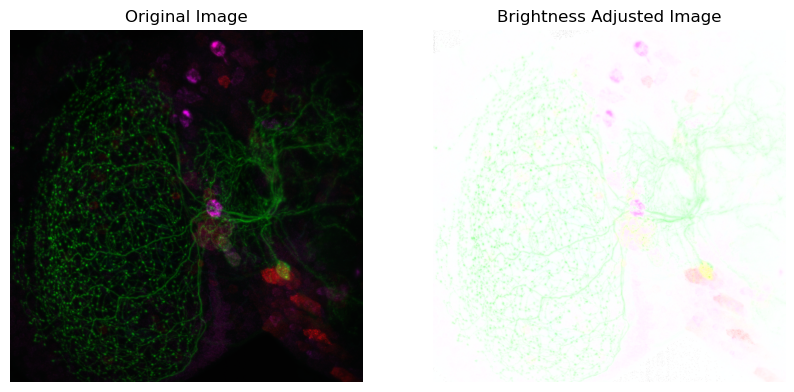

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Function to adjust brightness using histogram
def adjust_brightness(img, alpha):
    # Convert the image to YUV color space
    yuv = cv2.cvtColor(img, cv2.COLOR_BGR2YUV)
    y = yuv[:,:,0]  # Extract the Y channel (brightness)
    
    # Compute the histogram of the Y channel
    hist, bins = np.histogram(y.flatten(), 256, [0,256])
    
    # Apply brightness adjustment
    cdf = hist.cumsum()  # Compute the cumulative distribution function (CDF)
    cdf_normalized = cdf * hist.max() / cdf.max()  # Normalize the CDF
    
    # Adjust the CDF
    cdf_adjusted = np.clip(cdf * alpha, 0, 255).astype('uint8')
    
    # Map the old values to the new values using the adjusted CDF
    y_adjusted = cdf_adjusted[y]
    
    # Update the Y channel with the adjusted values
    yuv[:,:,0] = y_adjusted
    
    # Convert back to BGR color space
    img_adjusted = cv2.cvtColor(yuv, cv2.COLOR_YUV2BGR)
    return img_adjusted

# Load the image
img_path = '/nearline/flynp/EASI-FISH_NP_SS_OMEZarr/.zarrcade/NP03_R1_20230919/NP03_R1_3_5_SS34042_Proc_546_Nplp1_647_100x_LeftCentral/zmax.png'  # Replace with your image path
img = cv2.imread(img_path)

# Adjust the brightness
alpha = 0.1  # Factor to adjust brightness; >1 to increase, <1 to decrease
img_brightened = adjust_brightness(img, alpha)

# Display the original and adjusted images
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(img_brightened, cv2.COLOR_BGR2RGB))
plt.title('Brightness Adjusted Image')
plt.axis('off')

plt.show()

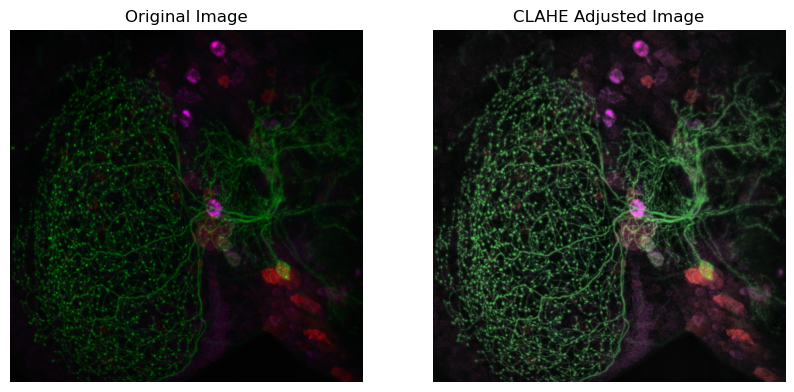

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Function to apply CLAHE to an image
def apply_clahe(img, clip_limit=2.0, tile_grid_size=(8, 8)):
    # Convert the image to YUV color space
    yuv = cv2.cvtColor(img, cv2.COLOR_BGR2YUV)
    y = yuv[:,:,0]  # Extract the Y channel (brightness)
    
    # Apply CLAHE to the Y channel
    clahe = cv2.createCLAHE(clipLimit=clip_limit, tileGridSize=tile_grid_size)
    y_clahe = clahe.apply(y)
    
    # Update the Y channel with the CLAHE output
    yuv[:,:,0] = y_clahe
    
    # Convert back to BGR color space
    img_clahe = cv2.cvtColor(yuv, cv2.COLOR_YUV2BGR)
    return img_clahe

# Load the image
img = cv2.imread(img_path)

# Apply CLAHE
img_clahe = apply_clahe(img)

# Display the original and CLAHE adjusted images
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(img_clahe, cv2.COLOR_BGR2RGB))
plt.title('CLAHE Adjusted Image')
plt.axis('off')

plt.show()